# Stock Price Prediction with LSTM

This notebook demonstrates how to predict stock prices using a Long Short-Term Memory (LSTM) neural network on historical S&P 500 data.

## 1. Data Collection

We use the `yfinance` library to download historical data for the S&P 500 index.

In [71]:
import yfinance as yf
stock = yf.Ticker("^GSPC")
stock = stock.history(period="max")

## 2. Creating Time Series Data

We define a function to transform the stock closing prices into sequences suitable for time series prediction. Each input sequence consists of a window of previous closing prices, and the corresponding output is the next closing price. This prepares the data for training the LSTM model.

In [80]:
import pandas as pd
import numpy as np

def getXandY(stock, window_size):
    arr = stock["Close_scaled"].to_numpy()
    X = []
    y = []
    for i in range(len(arr) - window_size):
        row = [[a] for a in arr[i:i+window_size]]
        X.append(row)
        y.append(arr[i+window_size])
    return np.array(X), np.array(y)


## 3. Data Preprocessing and Splitting

We preprocess the stock data by scaling the features using `MinMaxScaler` to ensure all values are between 0 and 1. We then create time series sequences for the LSTM model and split the data into training and test sets. This step prepares the data for effective model training and evaluation.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

stock = pd.DataFrame(stock)
scaler = MinMaxScaler()
stock["Close_scaled"] = scaler.fit_transform(stock[["Close"]])  # Add a new scaled column
print(stock)
window_size=10
X, y = getXandY(stock,window_size=window_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.shape

## 4. Model Building

We define and compile an LSTM-based neural network using TensorFlow/Keras.

In [82]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Input(shape = (window_size,1)),
    keras.layers.LSTM(64),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="linear")
])

## 5. Model Training

We compile the LSTM model using the Adam optimizer and mean squared error loss. The model is then trained on the training data and validated on the test set. After training, we use the model to generate predictions on the test data.

In [ ]:
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error

model.compile(optimizer = Adam(learning_rate=0.0001), loss="mse", metrics=["mae"])
model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

Epoch 1/25
612/612 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.9497e-06 - mae: 0.0015 - val_loss: 7.4365e-06 - val_mae: 0.0012
Epoch 2/25
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9.2182e-06 - mae: 0.0016 - val_loss: 7.1213e-06 - val_mae: 0.0011
Epoch 3/25
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.6407e-06 - mae: 0.0014 - val_loss: 8.5259e-06 - val_mae: 0.0011
Epoch 4/25
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9.6976e-06 - mae: 0.0015 - val_loss: 1.0591e-05 - val_mae: 0.0024
Epoch 5/25
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9.5864e-06 - mae: 0.0016 - val_loss: 7.2257e-06 - val_mae: 0.0012
Epoch 6/25
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0015e-05 - mae: 0.0016 - val_loss: 1.3416e-05 - val_mae: 0.0018
Epoch 7/25
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9.5832e-06 - mae: 0.0016 - val_loss: 8.2994e-06 - val_mae: 0.0016
Epoch 8/25
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9.1666e-06 - mae: 0.0015 - val_loss: 1.0952e-05 - val_mae:

## 6. Evaluation and Visualization

We visualize the model's predictions versus the actual values for the first 500 test samples. This plot helps us assess how closely the LSTM model's predictions follow the true stock prices.

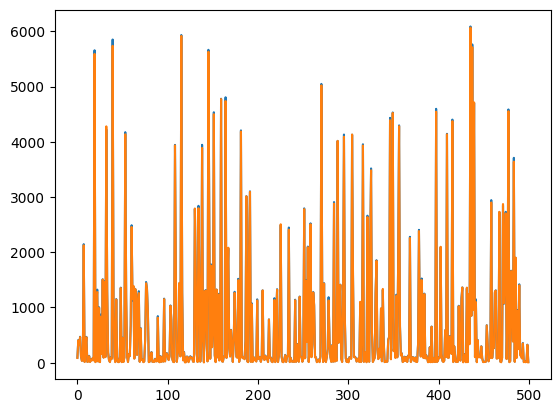

In [89]:
plt.plot(predictions[:500])
plt.plot(y_test[:500])